## PRODUCTIVITY FOR 5 PROVINCES ##

In [64]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
# ignore all warnings

import warnings
warnings.filterwarnings("ignore")

In [65]:
# to load productivity data

productivity = pd.read_csv('combined_productivity_clean.csv') # 

productivity.head()

,Date,provincename,Utilities,Construction,Manufacturing,Transportation and warehousing,Educational services,Health care and social assistance,Accommodation and food services,Other services except public administration,...,"Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction",Wholesale trade Retail trade,"Finance and insurance, real estate and rental and leasing",Professional scientific and technical services,Information culture and recreation,Population,GeoUID,census_year_ref,Dominant_NAICS,colourval
0,1997-01-01,Alberta,1.485804,17.399965,18.590137,13.340542,11.588955,13.343328,3.872117,5.368650,...,362.713936,17.907676,24.135310,15.578428,7.600796,7662.0,4801003,CA16,X11.Agriculture.forestry.fishing.hunting.21.Mi...,#8DA0CB
1,1997-02-01,Alberta,1.471049,17.695034,19.034434,13.617536,11.890582,13.739512,3.734915,5.496880,...,368.185093,17.586050,23.488937,16.206769,7.283954,7662.0,4801003,CA16,X11.Agriculture.forestry.fishing.hunting.21.Mi...,#8DA0CB
2,1997-03-01,Alberta,1.411428,16.630237,19.274297,14.453078,11.962199,13.321957,3.790906,5.773114,...,385.806995,17.377787,22.444308,15.380479,7.683184,7662.0,4801003,CA16,X11.Agriculture.forestry.fishing.hunting.21.Mi...,#8DA0CB
3,1997-04-01,Alberta,1.465141,16.642340,19.578348,13.256295,12.456337,14.011986,4.100418,5.658535,...,393.425984,17.690151,22.302734,15.873826,7.369425,7662.0,4801003,CA16,X11.Agriculture.forestry.fishing.hunting.21.Mi...,#8DA0CB
4,1997-05-01,Alberta,1.623730,18.062713,19.621579,13.355093,12.027437,13.889241,4.119427,5.613666,...,385.021311,16.922974,24.040353,15.534059,7.534485,7662.0,4801003,CA16,X11.Agriculture.forestry.fishing.hunting.21.Mi...,#8DA0CB


In [66]:
productivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342800 entries, 0 to 1342799
Data columns (total 21 columns):
 #   Column                                                                             Non-Null Count    Dtype  
---  ------                                                                             --------------    -----  
 0   Date                                                                               1342800 non-null  object 
 1   provincename                                                                       1342800 non-null  object 
 2   Utilities                                                                          1342800 non-null  float64
 3   Construction                                                                       1342800 non-null  float64
 4   Manufacturing                                                                      1342800 non-null  float64
 5   Transportation and warehousing                                                     1

In [67]:
#checking for missing values
productivity.isnull().sum()

Date                                                                                 0
provincename                                                                         0
Utilities                                                                            0
Construction                                                                         0
Manufacturing                                                                        0
Transportation and warehousing                                                       0
Educational services                                                                 0
Health care and social assistance                                                    0
Accommodation and food services                                                      0
Other services except public administration                                          0
Public administration                                                                0
Agriculture forestry fishing hunting, Minin

In [68]:
# update data column to datatime format
productivity['Date/Time'] = pd.to_datetime(productivity['Date'])
productivity

,Date,provincename,Utilities,Construction,Manufacturing,Transportation and warehousing,Educational services,Health care and social assistance,Accommodation and food services,Other services except public administration,...,Wholesale trade Retail trade,"Finance and insurance, real estate and rental and leasing",Professional scientific and technical services,Information culture and recreation,Population,GeoUID,census_year_ref,Dominant_NAICS,colourval,Date/Time
0,1997-01-01,Alberta,1.485804,17.399965,18.590137,13.340542,11.588955,13.343328,3.872117,5.368650,...,17.907676,24.135310,15.578428,7.600796,7662.0,4801003,CA16,X11.Agriculture.forestry.fishing.hunting.21.Mi...,#8DA0CB,1997-01-01
1,1997-02-01,Alberta,1.471049,17.695034,19.034434,13.617536,11.890582,13.739512,3.734915,5.496880,...,17.586050,23.488937,16.206769,7.283954,7662.0,4801003,CA16,X11.Agriculture.forestry.fishing.hunting.21.Mi...,#8DA0CB,1997-02-01
2,1997-03-01,Alberta,1.411428,16.630237,19.274297,14.453078,11.962199,13.321957,3.790906,5.773114,...,17.377787,22.444308,15.380479,7.683184,7662.0,4801003,CA16,X11.Agriculture.forestry.fishing.hunting.21.Mi...,#8DA0CB,1997-03-01
3,1997-04-01,Alberta,1.465141,16.642340,19.578348,13.256295,12.456337,14.011986,4.100418,5.658535,...,17.690151,22.302734,15.873826,7.369425,7662.0,4801003,CA16,X11.Agriculture.forestry.fishing.hunting.21.Mi...,#8DA0CB,1997-04-01
4,1997-05-01,Alberta,1.623730,18.062713,19.621579,13.355093,12.027437,13.889241,4.119427,5.613666,...,16.922974,24.040353,15.534059,7.534485,7662.0,4801003,CA16,X11.Agriculture.forestry.fishing.hunting.21.Mi...,#8DA0CB,1997-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342795,2021-08-01,Saskatchewan,2.829359,0.909181,1.765590,0.000000,2.069695,2.977844,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1061.0,4718852,CA16,X91.Public.administration,#FC8D62,2021-08-01
1342796,2021-09-01,Saskatchewan,3.860524,0.861926,1.813471,0.000000,2.696269,3.098698,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1061.0,4718852,CA16,X91.Public.administration,#FC8D62,2021-09-01
1342797,2021-10-01,Saskatchewan,3.350091,0.890384,1.686692,0.000000,2.679829,3.119581,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1061.0,4718852,CA16,X91.Public.administration,#FC8D62,2021-10-01
1342798,2021-11-01,Saskatchewan,3.166056,0.886212,1.862323,0.000000,2.630175,3.122140,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1061.0,4718852,CA16,X91.Public.administration,#FC8D62,2021-11-01


In [69]:
# to check  productivity date range
print(productivity['Date/Time'].min())
print(productivity['Date/Time'].max())

1997-01-01 00:00:00
2021-12-01 00:00:00


In [70]:
# to remove 1997 data to be consistent with the weather dataset
prod_clean = productivity[productivity['Date/Time'] >= '1998-01-01']
print(prod_clean['Date/Time'].min())
print(prod_clean['Date/Time'].max())

1998-01-01 00:00:00
2021-12-01 00:00:00


In [71]:
# to filter 5 provinces
filter = ['Quebec', 'Ontario', 'British Columbia', 'Alberta', 'Saskatchewan']
prod_clean = prod_clean[prod_clean['provincename'].isin(filter)]
print(prod_clean['provincename'].unique())
print(prod_clean.info())

['Alberta' 'British Columbia' 'Ontario' 'Quebec' 'Saskatchewan']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 993600 entries, 12 to 1342799
Data columns (total 22 columns):
 #   Column                                                                             Non-Null Count   Dtype         
---  ------                                                                             --------------   -----         
 0   Date                                                                               993600 non-null  object        
 1   provincename                                                                       993600 non-null  object        
 2   Utilities                                                                          993600 non-null  float64       
 3   Construction                                                                       993600 non-null  float64       
 4   Manufacturing                                                                      993600 non-nul

In [72]:
# to load weather_geography_merged data
weather_1998_2018Feb = pd.read_csv('weather_geography_merged_1998_to_2018Feb.csv')
weather_2018_2024 = pd.read_csv('final_merged_weather_2018_2024.csv')

In [73]:
# to convert the "Date/Time" column to date format
weather_1998_2018Feb['Date/Time'] = pd.to_datetime(weather_1998_2018Feb['Date/Time'])
weather_2018_2024['Date/Time'] = pd.to_datetime(weather_2018_2024['Date/Time'])

# to remove overlapping data (2018 Jan and Feb data)
weather_1998_2018Feb = weather_1998_2018Feb[weather_1998_2018Feb['Date/Time'] <= '2017-12-01']

# # to filter the 5 provinces
filter = ['Quebec', 'Ontario', 'British Columbia', 'Alberta', 'Saskatchewan']
weather_1998_2018Feb = weather_1998_2018Feb[weather_1998_2018Feb['provincename'].isin(filter)]
print(weather_1998_2018Feb['provincename'].unique())

# # to remove data from Feb 2024
weather_2018_2024 = weather_2018_2024[weather_2018_2024['Date/Time'] <= '2024-01-01']

['Quebec' 'Ontario' 'Saskatchewan' 'Alberta' 'British Columbia']


In [74]:
# to check date range of productivity

print(prod_clean['Date/Time'].min())
print(prod_clean['Date/Time'].max())

1998-01-01 00:00:00
2021-12-01 00:00:00


In [75]:
# to check date range of final weather

print(weather_1998_2018Feb['Date/Time'].min())
print(weather_1998_2018Feb['Date/Time'].max())

print(weather_2018_2024['Date/Time'].min())
print(weather_2018_2024['Date/Time'].max())


1998-01-01 00:00:00
2017-12-01 00:00:00
2018-01-01 00:00:00
2024-01-01 00:00:00


In [76]:
# to merge the 2 weather datasets
merged_weather = pd.concat([weather_1998_2018Feb, weather_2018_2024])
merged_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79262 entries, 3599 to 24271
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Longitude                  79262 non-null  float64       
 1   Latitude                   79262 non-null  float64       
 2   Station Name               79262 non-null  object        
 3   Climate ID                 79262 non-null  object        
 4   Date/Time                  79262 non-null  datetime64[ns]
 5   Year                       79262 non-null  int64         
 6   Month                      79262 non-null  int64         
 7   Mean Max Temp (°C)         76868 non-null  float64       
 8   Mean Max Temp Flag         54990 non-null  object        
 9   Mean Min Temp (°C)         76883 non-null  float64       
 10  Mean Min Temp Flag         54990 non-null  object        
 11  Mean Temp (°C)             75971 non-null  float64       
 12  M

In [77]:
# to check shape of the datasets
print(prod_clean.shape)
print(merged_weather.shape)

(993600, 22)
(79262, 32)


In [78]:
# to merge data:

merged_data = pd.merge(prod_clean, 
                       merged_weather,
                       on = ['GeoUID', 'Date/Time', 'provincename'],
                       how = 'right'
)
###### UPDATED: TO REVERT BACK IF DOESN'T WORK!!! how: from right to outer
    # used 'right' to only get productivity data that have weather data
    # not all GeoUID have weather data; we won't be able to forecast productivity for those GeoUID without the weather data

In [79]:
# to check shape of the datasets
print(prod_clean.shape)
print(merged_weather.shape)
print(merged_data.shape)

(993600, 22)
(79262, 32)
(79262, 51)


In [80]:
# to check date range
print(merged_data['Date/Time'].min())
print(merged_data['Date/Time'].max())

1998-01-01 00:00:00
2024-01-01 00:00:00


In [81]:
# to remove unnecessary columns

merged_data.drop(columns = ['Date', 'Year', 'Month',
                            'census_year_ref', 'Dominant_NAICS',
                            'colourval'],
                 inplace = True)

In [82]:
# to arrange columns

columns_to_move = ['provincename', 'Longitude', 'Latitude', 'Region.Name', 'Date/Time']
remaining_columns = [col for col in merged_data.columns if col not in columns_to_move]
new_order = columns_to_move + remaining_columns
merged_data = merged_data[new_order]

In [83]:
# remove flag columns
flag_columns = [col for col in merged_data.columns if 'Flag' in col]
merged_data = merged_data.drop(columns = flag_columns)

In [84]:
# to remove stations that does not have productivity data
filter = ['KEMANO',
    'MCINNES ISLAND',
    'QUATSINO',
    'QUATSINO LIGHTSTATION',
    'SARTINE ISLAND (AUT)',
    'CHALK RIVER AECL',
    'OTTAWA CDA',
    "L'ETAPE"]
merged_data = merged_data[~merged_data['Station Name'].isin(filter)]
# print(merged_data['provincename'].unique())
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78046 entries, 0 to 79261
Data columns (total 34 columns):
 #   Column                                                                             Non-Null Count  Dtype         
---  ------                                                                             --------------  -----         
 0   provincename                                                                       78046 non-null  object        
 1   Longitude                                                                          78046 non-null  float64       
 2   Latitude                                                                           78046 non-null  float64       
 3   Region.Name                                                                        78046 non-null  object        
 4   Date/Time                                                                          78046 non-null  datetime64[ns]
 5   Utilities                                            

In [85]:
merged_data['Snow Grnd Last Day (cm)'].fillna(0, inplace = True)

In [86]:
merged_data.isnull().sum()

provincename                                                                            0
Longitude                                                                               0
Latitude                                                                                0
Region.Name                                                                             0
Date/Time                                                                               0
Utilities                                                                            7836
Construction                                                                         7836
Manufacturing                                                                        7836
Transportation and warehousing                                                       7836
Educational services                                                                 7836
Health care and social assistance                                                    7836
Accommodat

In [88]:
# columns
columns_list = [
    'provincename',
    'Longitude',
    'Latitude',
    'Region.Name',
    'Date/Time',
    'Population',
    'GeoUID',
    'Station Name',
    'Climate ID',
    'Mean Max Temp (°C)',
    'Mean Min Temp (°C)',
    'Mean Temp (°C)',
    'Extr Max Temp (°C)',
    'Extr Min Temp (°C)',
    'Total Rain (mm)',
    'Total Snow (cm)',
    'Total Precip (mm)',
    'Snow Grnd Last Day (cm)',
    'Dir of Max Gust (10s deg)',
    'Spd of Max Gust (km/h)'
]

#melting the DataFrame to convert "Productivity areas" columns into rows
merged_data = pd.melt(merged_data, id_vars=columns_list, var_name='productivity_sector', value_name='GDP_Value')

#checking changes
merged_data

,provincename,Longitude,Latitude,Region.Name,Date/Time,Population,GeoUID,Station Name,Climate ID,Mean Max Temp (°C),...,Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),productivity_sector,GDP_Value
0,Quebec,-78.28,48.80,Berry (MÉ),1998-01-01,538.0,2488070,LAC BERRY,709CEE9,-8.400000,...,4.0,-39.0,1.0,42.0,43.0,52.0,0.0,0.0,Utilities,0.0
1,Quebec,-78.28,48.80,Berry (MÉ),1998-02-01,538.0,2488070,LAC BERRY,709CEE9,-1.100000,...,8.0,-37.0,0.0,24.0,24.0,52.0,0.0,0.0,Utilities,0.0
2,Quebec,-78.28,48.80,Berry (MÉ),1998-03-01,538.0,2488070,LAC BERRY,709CEE9,0.800000,...,16.0,-35.0,62.4,31.0,93.4,22.0,0.0,0.0,Utilities,0.0
3,Quebec,-78.28,48.80,Berry (MÉ),1998-04-01,538.0,2488070,LAC BERRY,709CEE9,11.000000,...,23.0,-12.0,23.0,2.0,25.0,0.0,0.0,0.0,Utilities,0.0
4,Quebec,-78.28,48.80,Berry (MÉ),1998-05-01,538.0,2488070,LAC BERRY,709CEE9,20.800000,...,32.0,-5.0,33.3,0.0,33.3,0.0,0.0,0.0,Utilities,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092639,Saskatchewan,-102.12,49.32,Moose Creek No. 33 (RM),2023-09-01,NaN,4701036,OXBOW,4015800,22.783333,...,33.5,1.0,21.4,0.0,21.4,0.0,0.0,0.0,Information culture and recreation,NaN
1092640,Saskatchewan,-102.12,49.32,Moose Creek No. 33 (RM),2023-10-01,NaN,4701036,OXBOW,4015800,9.250000,...,21.0,-18.0,42.8,25.0,67.8,16.0,0.0,0.0,Information culture and recreation,NaN
1092641,Saskatchewan,-102.12,49.32,Moose Creek No. 33 (RM),2023-11-01,NaN,4701036,OXBOW,4015800,2.611111,...,13.5,-17.5,4.0,6.0,10.0,0.0,0.0,0.0,Information culture and recreation,NaN
1092642,Saskatchewan,-102.12,49.32,Moose Creek No. 33 (RM),2023-12-01,NaN,4701036,OXBOW,4015800,0.648148,...,11.5,-20.0,9.6,11.0,20.6,5.0,0.0,0.0,Information culture and recreation,NaN


In [89]:
merged_data.isnull().sum()

provincename                      0
Longitude                         0
Latitude                          0
Region.Name                       0
Date/Time                         0
Population                   109704
GeoUID                            0
Station Name                      0
Climate ID                        0
Mean Max Temp (°C)            32984
Mean Min Temp (°C)            32774
Mean Temp (°C)                45542
Extr Max Temp (°C)            32984
Extr Min Temp (°C)            32774
Total Rain (mm)                   0
Total Snow (cm)                   0
Total Precip (mm)                 0
Snow Grnd Last Day (cm)           0
Dir of Max Gust (10s deg)         0
Spd of Max Gust (km/h)            0
productivity_sector               0
GDP_Value                    109704
dtype: int64

In [90]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092644 entries, 0 to 1092643
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   provincename               1092644 non-null  object        
 1   Longitude                  1092644 non-null  float64       
 2   Latitude                   1092644 non-null  float64       
 3   Region.Name                1092644 non-null  object        
 4   Date/Time                  1092644 non-null  datetime64[ns]
 5   Population                 982940 non-null   float64       
 6   GeoUID                     1092644 non-null  int64         
 7   Station Name               1092644 non-null  object        
 8   Climate ID                 1092644 non-null  object        
 9   Mean Max Temp (°C)         1059660 non-null  float64       
 10  Mean Min Temp (°C)         1059870 non-null  float64       
 11  Mean Temp (°C)             1047102 no

#### Handling the missing values for temp columns. Now as the temperature is essential for our analysis, we can"t staright up eliminate the null values, therefore the best way we could come up with was to take a mean of all the temperature of that months and filling the null values with the corresponding months mean we calculate. 

In [91]:
#Columns with missing values
columns_with_missing_values = ['Mean Max Temp (°C)', 'Mean Min Temp (°C)', 'Mean Temp (°C)', 'Extr Max Temp (°C)', 'Extr Min Temp (°C)']

#Create a 'Month' column from 'Date/Time'
merged_data['Month'] = merged_data['Date/Time'].dt.month

#Iterate through each column and fill missing values with the mean of the corresponding months
for column in columns_with_missing_values:
    # Create a mask for missing values in the current column
    missing_values_mask = merged_data[column].isnull()
    
    # Calculate the mean for each month in the column
    monthly_means = merged_data.groupby('Month')[column].mean()
    
    # Fill missing values with the mean of the corresponding month
    merged_data.loc[missing_values_mask, column] = merged_data.loc[missing_values_mask, 'Month'].map(monthly_means)

# Drop the 'Month' column if you don't want to keep it
merged_data.drop(columns=['Month'], inplace=True)

In [92]:
merged_data.isnull().sum()

provincename                      0
Longitude                         0
Latitude                          0
Region.Name                       0
Date/Time                         0
Population                   109704
GeoUID                            0
Station Name                      0
Climate ID                        0
Mean Max Temp (°C)                0
Mean Min Temp (°C)                0
Mean Temp (°C)                    0
Extr Max Temp (°C)                0
Extr Min Temp (°C)                0
Total Rain (mm)                   0
Total Snow (cm)                   0
Total Precip (mm)                 0
Snow Grnd Last Day (cm)           0
Dir of Max Gust (10s deg)         0
Spd of Max Gust (km/h)            0
productivity_sector               0
GDP_Value                    109704
dtype: int64

In [93]:
# to ouput data

csv_path = 'merged_temp_clean_data.csv'
merged_data.to_csv(csv_path,
                   index = False)

# this data contains the geojson, weather, and productivity

#### From here is Time series analysis

In [94]:
merged_filtered = merged_data[merged_data['Date/Time'].dt.year <= 2021].copy()

In [95]:
merged_filtered.isnull().sum()

provincename                 0
Longitude                    0
Latitude                     0
Region.Name                  0
Date/Time                    0
Population                   0
GeoUID                       0
Station Name                 0
Climate ID                   0
Mean Max Temp (°C)           0
Mean Min Temp (°C)           0
Mean Temp (°C)               0
Extr Max Temp (°C)           0
Extr Min Temp (°C)           0
Total Rain (mm)              0
Total Snow (cm)              0
Total Precip (mm)            0
Snow Grnd Last Day (cm)      0
Dir of Max Gust (10s deg)    0
Spd of Max Gust (km/h)       0
productivity_sector          0
GDP_Value                    0
dtype: int64

           Longitude       Latitude     Population        GeoUID  \
count  982940.000000  982940.000000  982940.000000  9.829400e+05   
mean      -99.222596      48.973597   30283.697564  4.268813e+06   
std        22.010013       3.365611  108218.961134  1.403919e+06   
min      -136.370000      42.040000      41.000000  2.403005e+06   
25%      -119.720000      46.050000    1044.000000  2.480015e+06   
50%      -107.150000      49.170000    3824.000000  4.711042e+06   
75%       -74.350000      51.080000   11249.000000  5.909032e+06   
max       -64.200000      59.570000  934243.000000  5.957022e+06   

       Mean Max Temp (°C)  Mean Min Temp (°C)  Mean Temp (°C)  \
count       982940.000000       982940.000000   982940.000000   
mean            10.419499            0.599095        5.507649   
std             10.623589            9.623054        9.917053   
min            -24.600000          -36.000000      -29.637500   
25%              0.700000           -5.800000       -1.236978 

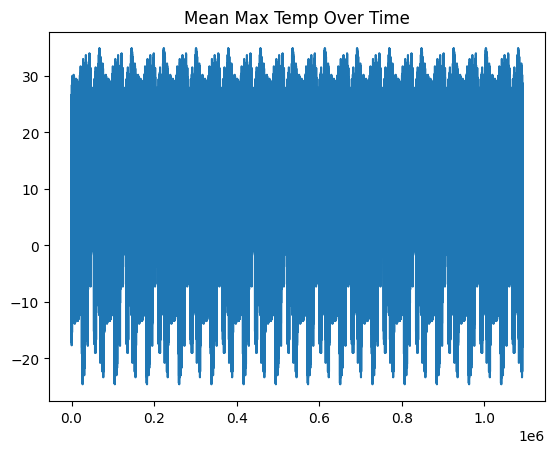

In [96]:
# Explore data distribution and summary statistics
print(merged_filtered.describe())

# Visualize climate variables over time
merged_filtered['Mean Max Temp (°C)'].plot(label='Mean Max Temp')
plt.title('Mean Max Temp Over Time')
plt.show()

In [97]:
def calculate_mse(actual, predicted):
    """
    Calculate Mean Squared Error (MSE).

    Parameters:
    - actual: array-like, actual values
    - predicted: array-like, predicted values

    Returns:
    - mse: float, Mean Squared Error
    """
    squared_errors = (actual - predicted)**2
    mse = squared_errors.mean()
    return mse


# Use seasonal_decompose to decompose the time series with additive model
result_additive = seasonal_decompose(time_series, model='additive', period=12)

# Calculate MSE for the additive model
mse_additive = calculate_mse(time_series, result_additive.resid.dropna())

mse_additive

144.69472398862555

In [125]:
# Selecting Ontario data for a specific province and climate variable (Mean Max Temp)
province_data = merged_filtered[merged_filtered['provincename'] == 'Ontario']
time_series = province_data['Mean Max Temp (°C)']

# Ensure the 'Date/Time' column is in datetime format
province_data['Date/Time'] = pd.to_datetime(province_data['Date/Time'])

In [128]:
province_data

,provincename,Longitude,Latitude,Region.Name,Date/Time,Population,GeoUID,Station Name,Climate ID,Mean Max Temp (°C),...,Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),productivity_sector,GDP_Value
20066,Ontario,-77.88,45.07,Faraday (TP),1998-01-01,1401.0,3512058,BANCROFT AUTO,616I001,-2.700000,...,5.5,-31.5,0.0,0.0,123.0,0.0,0.0,0.0,Utilities,2.157344
20067,Ontario,-77.88,45.07,Faraday (TP),1998-02-01,1401.0,3512058,BANCROFT AUTO,616I001,3.400000,...,10.6,-27.4,0.0,0.0,0.0,0.0,0.0,0.0,Utilities,2.336429
20068,Ontario,-77.88,45.07,Faraday (TP),1998-03-01,1401.0,3512058,BANCROFT AUTO,616I001,3.800000,...,22.3,-24.4,0.0,0.0,0.0,0.0,0.0,0.0,Utilities,2.308242
20069,Ontario,-77.88,45.07,Faraday (TP),1998-04-01,1401.0,3512058,BANCROFT AUTO,616I001,13.400000,...,23.0,-8.4,0.0,0.0,43.5,0.0,0.0,0.0,Utilities,2.503029
20070,Ontario,-77.88,45.07,Faraday (TP),1998-05-01,1401.0,3512058,BANCROFT AUTO,616I001,22.100000,...,29.9,-3.2,0.0,0.0,48.4,0.0,0.0,0.0,Utilities,2.393748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087846,Ontario,-74.75,45.02,Akwesasne (Part) 59 (IRI),2021-08-01,1487.0,3501007,CORNWALL,6101874,27.612903,...,33.0,11.0,93.8,0.0,93.8,0.0,0.0,0.0,Information culture and recreation,2.722859
1087847,Ontario,-74.75,45.02,Akwesasne (Part) 59 (IRI),2021-09-01,1487.0,3501007,CORNWALL,6101874,22.100000,...,27.5,5.0,75.1,0.0,75.1,0.0,0.0,0.0,Information culture and recreation,3.027902
1087848,Ontario,-74.75,45.02,Akwesasne (Part) 59 (IRI),2021-10-01,1487.0,3501007,CORNWALL,6101874,15.967742,...,24.5,0.0,126.6,0.0,126.6,0.0,0.0,0.0,Information culture and recreation,2.997773
1087849,Ontario,-74.75,45.02,Akwesasne (Part) 59 (IRI),2021-11-01,1487.0,3501007,CORNWALL,6101874,7.500000,...,15.0,-8.5,59.5,5.0,64.5,1.0,0.0,0.0,Information culture and recreation,3.083054


In [127]:
time_series

20066      -2.700000
20067       3.400000
20068       3.800000
20069      13.400000
20070      22.100000
             ...    
1087846    27.612903
1087847    22.100000
1087848    15.967742
1087849     7.500000
1087850     1.333333
Name: Mean Max Temp (°C), Length: 121814, dtype: float64

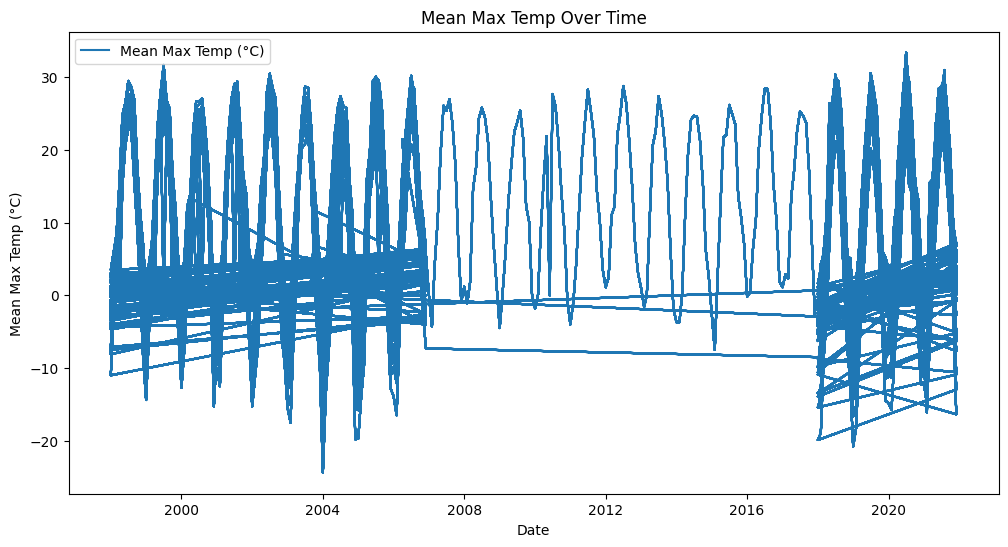

In [99]:
plt.figure(figsize=(12, 6))
plt.plot(province_data['Date/Time'], time_series, label='Mean Max Temp (°C)')
plt.title('Mean Max Temp Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Max Temp (°C)')
plt.legend()
plt.show()

In [100]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -22.237913194170662
p-value: 0.0


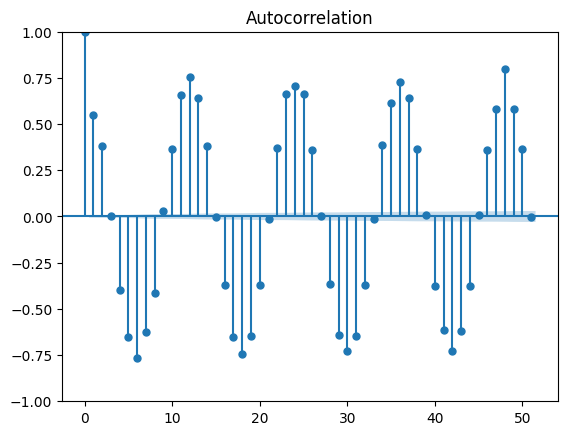

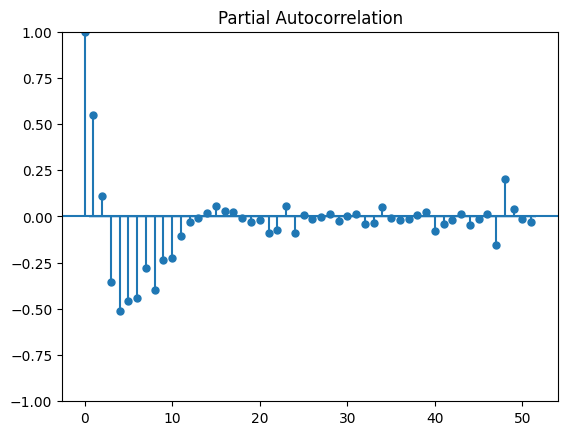

In [101]:
# Step 5: Calculate the differenced time series
time_series_diff = time_series.diff().dropna()

# Plot ACF and PACF for differenced time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(time_series_diff)
plot_pacf(time_series_diff)
plt.show()


In [131]:
time_series_diff

20067      6.100000
20068      0.400000
20069      9.600000
20070      8.700000
20071      0.000000
             ...   
1087846    2.354839
1087847   -5.512903
1087848   -6.132258
1087849   -8.467742
1087850   -6.166667
Name: Mean Max Temp (°C), Length: 121813, dtype: float64

In [102]:
# Use seasonal decomposition to determine the seasonal order (p, d, q, s)
result = seasonal_decompose(time_series, model='additive', period=12)
seasonal_order = (result.seasonal.size - 1, 1, 1, 12)

In [103]:
import itertools
import statsmodels.api as sm

# Define the range of parameter values
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(p, d, q)) for s in [12]]  # CHANGED!! Assuming seasonality of 12 for monthly data
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq [1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq [2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3])) 
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
# This generates a long list of all combinations for p,d,q,s values for SARIMAX. 
# This code take long time to execute be patient!!.

for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(time_series, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
                results = mod.fit()
                print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue


In [104]:
# model fiting
import statsmodels.api as sm 

mod = sm.tsa.statespace.SARIMAX(time_series, order= (1,1,1), seasonal_order = (1,1,1,12), enforce_stationarity=False, 
                                enforce_invertibility=False)
mod_results = mod.fit()

In [ ]:
# Forecast future values
forecast_steps = 12  # Change this based on your desired forecast horizon
future_forecast = results.get_forecast(steps=forecast_steps)

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series, label='Actual')
plt.plot(future_forecast.predicted_mean.index, future_forecast.predicted_mean, color='red', label='Forecast')
plt.title(f'SARIMA Forecast for Ontario')
plt.xlabel('Date')
#plt.ylabel(climate_variable)
plt.legend()
plt.show()


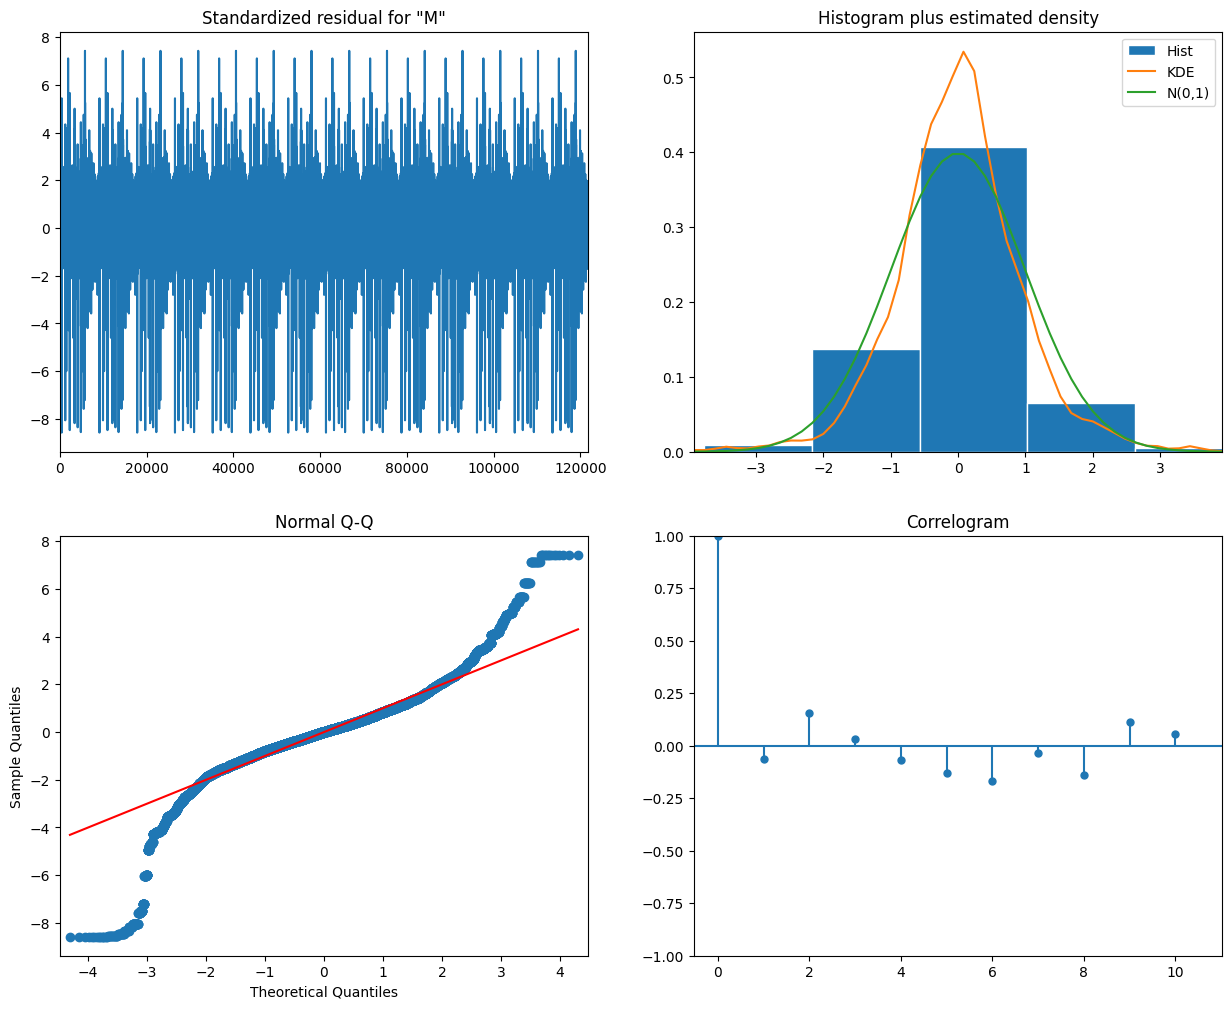

In [137]:
mod_results.plot_diagnostics(figsize=(15,12))
plt.show()

**Standardized Residual for ‘M’:** The residuals seem to be randomly scattered around zero, which is a good sign. It suggests that your model is a good fit for the data as it’s capturing most of the information. There doesn’t appear to be any obvious pattern in the residuals, which indicates that the model’s assumptions are likely being met.
**Histogram Plus Estimated Density:** The histogram and the estimated density line suggest that the residuals are approximately normally distributed, which is another good sign. This is one of the assumptions of many statistical models.
**Normal Q-Q:** The points in the Q-Q plot are closely following the red line, which suggests that the residuals are normally distributed. This is another indication that the model’s assumptions are being met.
**Correlogram:** The correlogram shows that the autocorrelation of the residuals is low for all lags. This is expected, as ideally, we want the residuals to be uncorrelated noise. If there were significant autocorrelations at certain lags, it would suggest that there is some pattern in the residuals that the model isn’t capturing.
In **summary**, these graphs suggest that your model is doing a good job of capturing the patterns in the data. The residuals appear to be uncorrelated, normally distributed noise, which is what we would hope to see when our model is a good fit. However, always remember to validate these insights with domain knowledge and other statistical tests as needed. I hope this helps! Let me know if you have any other questions.

# The forecasting above is according to me not correct, it could be I'm not sure.
# Below coding I'm trying different codes to predict from different soucres.

In [138]:
time_series

20066      -2.700000
20067       3.400000
20068       3.800000
20069      13.400000
20070      22.100000
             ...    
1087846    27.612903
1087847    22.100000
1087848    15.967742
1087849     7.500000
1087850     1.333333
Name: Mean Max Temp (°C), Length: 121814, dtype: float64

In [147]:
time_series.index = pd.to_datetime(time_series.index)
time_series.index.min()

Timestamp('1970-01-01 00:00:00.000020066')

In [148]:
min_date = time_series.min()
min_date

-24.4

In [149]:
time_series

1970-01-01 00:00:00.000020066    -2.700000
1970-01-01 00:00:00.000020067     3.400000
1970-01-01 00:00:00.000020068     3.800000
1970-01-01 00:00:00.000020069    13.400000
1970-01-01 00:00:00.000020070    22.100000
                                   ...    
1970-01-01 00:00:00.001087846    27.612903
1970-01-01 00:00:00.001087847    22.100000
1970-01-01 00:00:00.001087848    15.967742
1970-01-01 00:00:00.001087849     7.500000
1970-01-01 00:00:00.001087850     1.333333
Name: Mean Max Temp (°C), Length: 121814, dtype: float64

In [153]:
import pandas as pd

# Convert the index of the time series data to Timestamp type
time_series.index = pd.to_datetime(time_series.index)

# Find the minimum date in your time series data
min_date = time_series.index.min()

# Define the start date for prediction
start_date = max(pd.to_datetime('1998-01-01'), min_date)

# Check if '1998-01-01' is before the minimum date in the data
if start_date == min_date:
    print("Start date '1998-01-01' is before or equal to the minimum date in the data.")
else:
    # Provide a start date that is within the range of your data
    pred = results.get_prediction(start=start_date, dynamic=False)
    pred_ci = pred.conf_int()


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [112]:
# Convert the index of the time series data to Timestamp type
time_series.index = pd.to_datetime(time_series.index)

# Find the minimum date in your time series data
min_date = time_series.index.min()
min_date

Timestamp('1970-01-01 00:00:00.000020066')

In [116]:
pred = results.get_prediction(start=min_date, dynamic=False)
pred_ci = pred.conf_int()


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'